In [ ]:
###############################
#Script for comparing TCGA RNA-Seqand microarray DeepProfile embeddings
###############################

import pandas as pd
import numpy as np
import csv
import sys
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

/homes/gws/abdincer/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cancer_types = ['BRCA',
               'COLON',
               'LUNG',
               'BRAIN',
                'OV',
               'KIDNEY',
               'UTERINE']

tcga_types = [['BRCA'],
             ['COADREAD'],
             ['LUAD', 'LUSC'],
             ['GBMLGG'],
             ['OV'],
             ['KIPAN'], 
             ['UCEC']]


In [3]:
#Read all embeddings
all_dfs = []
for c in range(len(cancer_types)):
    
    cancer_type = cancer_types[c]
    print("-------------------------------")
    print("CANCER TYPE ", cancer_type)
    
    input_folder = '../../ALL_CANCER_FILES/' + cancer_type + '/TCGA_FILES/'
        
    cancer_type_dfs = []
    micro_list = []
    for t in range(len(tcga_types[c])):        
        microarray_df = pd.read_csv(input_folder + tcga_types[c][t] + 
                   '_DeepProfile_TCGA_MICROARRAY_Embedding_150L.tsv', 
                   sep = '\t', index_col = 0)
        micro_list.append(microarray_df)
    microarray_df = pd.concat(micro_list)

    rnaseq_list = []
    for t in range(len(tcga_types[c])):        
        rnaseq_df = pd.read_csv(input_folder + tcga_types[c][t] + 
                   '_DeepProfile_TCGA_RNASeq_Embedding_150L.tsv', 
                   sep = '\t', index_col = 0)
        rnaseq_list.append(rnaseq_df)
    rnaseq_df = pd.concat(rnaseq_list)

    
    #Find common samples
    microarray_samples = microarray_df.index
    rnaseq_samples = rnaseq_df.index
    common_samples = np.intersect1d(microarray_samples, rnaseq_samples)
    print("Common samples ", common_samples.shape)

    #Find correlations between each node
    microarray_df = microarray_df.T[common_samples].T
    rnaseq_df = rnaseq_df.T[common_samples].T
    microarray_df = microarray_df.loc[~microarray_df.index.duplicated(keep='first')]
    rnaseq_df = rnaseq_df.loc[~rnaseq_df.index.duplicated(keep='first')]

    node_correlations = []
    for n in range(microarray_df.shape[0]):
        corr = scipy.stats.pearsonr(microarray_df.values[n, :], rnaseq_df.values[n, :])[0]
        node_correlations.append(corr)
    print(np.sort(node_correlations))

        
    micro_list = []
    for t in range(len(tcga_types[c])):        
        microarray_df = pd.read_csv(input_folder  
                         + 'TCGA_' + tcga_types[c][t] 
                         + '_PREPROCESSED_MICROARRAY_EXPRESSION.tsv', 
                         sep = '\t', index_col = 0)
        micro_list.append(microarray_df)
    microarray_df = pd.concat(micro_list)

    rnaseq_list = []
    for t in range(len(tcga_types[c])):        
        rnaseq_df = pd.read_csv( input_folder
                                 + 'TCGA_' + tcga_types[c][t] 
                                 + '_PREPROCESSED_RNASEQ_EXPRESSION.tsv', 
                           sep = '\t', index_col = 0)
        rnaseq_list.append(rnaseq_df)
    rnaseq_df = pd.concat(rnaseq_list)

        
    #Find common samples
    microarray_samples = microarray_df.index
    rnaseq_samples = rnaseq_df.index
    common_samples = np.intersect1d(microarray_samples, rnaseq_samples)
    print("Common samples ", common_samples.shape)

    #Detect common genes
    common_genes = np.intersect1d(microarray_df.columns, rnaseq_df.columns)
    microarray_df = microarray_df[common_genes]
    rnaseq_df = rnaseq_df[common_genes]
    print("Common genes ", common_genes.shape)

    #Find correlations between each node
    microarray_df = microarray_df.T[common_samples].T
    rnaseq_df = rnaseq_df.T[common_samples].T
    microarray_df = microarray_df.loc[~microarray_df.index.duplicated(keep='first')]
    rnaseq_df = rnaseq_df.loc[~rnaseq_df.index.duplicated(keep='first')]

    print(microarray_df.shape)
    print(rnaseq_df.shape)

    print(microarray_df.index)
    print(rnaseq_df.index)

    print(microarray_df.columns)
    print(rnaseq_df.columns)

    gene_correlations = []
    for n in range(microarray_df.shape[0]):
        corr = scipy.stats.pearsonr(microarray_df.values[n, :], rnaseq_df.values[n, :])[0]
        gene_correlations.append(corr)
    gene_correlations = np.asarray(gene_correlations)[~np.isnan(gene_correlations)]
    print(np.sort(gene_correlations))

    vals = np.concatenate((gene_correlations, node_correlations))
    vals = vals.astype(float)
    df_vals = pd.DataFrame(vals)
    df_labels = pd.DataFrame(np.concatenate((['Correlation between sample expressions'] * len(gene_correlations), 
                                            ['Correlation between sample DeepProfile LDRs'] * len(node_correlations))))

    df_cancers = pd.DataFrame([cancer_type] * df_labels.shape[0])
    joined_df = pd.concat([df_vals, df_labels, df_cancers], axis = 1)
    joined_df = pd.DataFrame(joined_df.values, index = joined_df.index, columns = ['values', 'type', 'cancer'])
    joined_df = joined_df.astype({'values': 'float'})
    
    all_dfs.append(joined_df)


-------------------------------
CANCER TYPE  BRCA
Common samples  (529,)
[-0.38424713 -0.25102405  0.08817485  0.09891056  0.19603708  0.2200744
  0.27315604  0.363608    0.40128485  0.45898351  0.4627694   0.4797991
  0.48149753  0.49061262  0.49233402  0.5045746   0.51973036  0.52096237
  0.52101453  0.53885854  0.53926938  0.54915637  0.54934575  0.55809218
  0.56220986  0.56512934  0.56555724  0.56927653  0.57307175  0.57528838
  0.59532755  0.59683876  0.60115311  0.60169849  0.60506634  0.62017089
  0.62373288  0.62984651  0.63201183  0.64766589  0.65061451  0.65738756
  0.66060834  0.66299597  0.67282944  0.67329685  0.67385447  0.67494065
  0.67515916  0.67903971  0.69694423  0.70620833  0.7086116   0.7137853
  0.71539265  0.71549069  0.71968821  0.72027742  0.72353671  0.72764431
  0.72906285  0.73129179  0.73143839  0.73241949  0.73581564  0.73915708
  0.7432658   0.74345563  0.74411096  0.74490759  0.74542897  0.75694982
  0.7576066   0.7576311   0.76007574  0.76227492  0.76

Common samples  (220,)
Common genes  (10030,)
(220, 10030)
(220, 10030)
Index(['TCGA-A6-2672-01', 'TCGA-A6-2674-01', 'TCGA-A6-2676-01',
       'TCGA-A6-2677-01', 'TCGA-A6-2678-01', 'TCGA-A6-2683-01',
       'TCGA-A6-3807-01', 'TCGA-A6-3808-01', 'TCGA-A6-3809-01',
       'TCGA-A6-3810-01',
       ...
       'TCGA-AG-A01L-01', 'TCGA-AG-A01N-01', 'TCGA-AG-A023-01',
       'TCGA-AG-A025-01', 'TCGA-AG-A026-01', 'TCGA-AG-A02G-01',
       'TCGA-AG-A02X-01', 'TCGA-AG-A032-01', 'TCGA-AY-4070-01',
       'TCGA-AY-4071-01'],
      dtype='object', length=220)
Index(['TCGA-A6-2672-01', 'TCGA-A6-2674-01', 'TCGA-A6-2676-01',
       'TCGA-A6-2677-01', 'TCGA-A6-2678-01', 'TCGA-A6-2683-01',
       'TCGA-A6-3807-01', 'TCGA-A6-3808-01', 'TCGA-A6-3809-01',
       'TCGA-A6-3810-01',
       ...
       'TCGA-AG-A01L-01', 'TCGA-AG-A01N-01', 'TCGA-AG-A023-01',
       'TCGA-AG-A025-01', 'TCGA-AG-A026-01', 'TCGA-AG-A02G-01',
       'TCGA-AG-A02X-01', 'TCGA-AG-A032-01', 'TCGA-AY-4070-01',
       'TCGA-AY-4071-01']

Common samples  (150,)
[-0.2518062  -0.15070213 -0.03234484  0.07372368  0.09972947  0.12168576
  0.12293278  0.13573996  0.15535565  0.16856876  0.18374518  0.22045802
  0.23370279  0.24167535  0.25791288  0.25819386  0.25855992  0.26242595
  0.26573548  0.26841197  0.28856561  0.29768689  0.30361033  0.34416023
  0.35835587  0.36118459  0.36245682  0.36812268  0.37248749  0.38101217
  0.38249625  0.39617001  0.39766674  0.40992106  0.42261527  0.43475937
  0.44103751  0.44227051  0.44641694  0.45289703  0.45486488  0.45974492
  0.48043605  0.48649342  0.49186882  0.49390676  0.49538605  0.49864993
  0.50699652  0.51239852  0.51321143  0.52638053  0.53026344  0.53114189
  0.53191327  0.53300365  0.54491815  0.54834297  0.5484696   0.55462371
  0.5669257   0.56713824  0.57205424  0.57703997  0.58007709  0.58310601
  0.58358012  0.58642883  0.58724774  0.58740429  0.58743705  0.58789621
  0.59067338  0.59411773  0.59828542  0.59974397  0.60311132  0.60578584
  0.60764706  0.60931459  0.

Common samples  (298,)
Common genes  (10342,)
(298, 10342)
(298, 10342)
Index(['TCGA-04-1348-01', 'TCGA-04-1357-01', 'TCGA-04-1362-01',
       'TCGA-04-1364-01', 'TCGA-04-1365-01', 'TCGA-04-1514-01',
       'TCGA-04-1519-01', 'TCGA-09-0364-01', 'TCGA-09-0366-01',
       'TCGA-09-0367-01',
       ...
       'TCGA-61-2095-01', 'TCGA-61-2097-01', 'TCGA-61-2098-01',
       'TCGA-61-2101-01', 'TCGA-61-2102-01', 'TCGA-61-2104-01',
       'TCGA-61-2109-01', 'TCGA-61-2110-01', 'TCGA-61-2111-01',
       'TCGA-61-2113-01'],
      dtype='object', length=298)
Index(['TCGA-04-1348-01', 'TCGA-04-1357-01', 'TCGA-04-1362-01',
       'TCGA-04-1364-01', 'TCGA-04-1365-01', 'TCGA-04-1514-01',
       'TCGA-04-1519-01', 'TCGA-09-0364-01', 'TCGA-09-0366-01',
       'TCGA-09-0367-01',
       ...
       'TCGA-61-2095-01', 'TCGA-61-2097-01', 'TCGA-61-2098-01',
       'TCGA-61-2101-01', 'TCGA-61-2102-01', 'TCGA-61-2104-01',
       'TCGA-61-2109-01', 'TCGA-61-2110-01', 'TCGA-61-2111-01',
       'TCGA-61-2113-01']

Common samples  (54,)
[0.26382091 0.36415511 0.54926391 0.60372696 0.64589882 0.6642261
 0.6835188  0.7006026  0.71258553 0.71583264 0.71817787 0.75797219
 0.76027791 0.76044624 0.80413095 0.82289717 0.82891767 0.83319853
 0.83461237 0.83896695 0.85881887 0.86028631 0.87109646 0.8714148
 0.89534486 0.90882659 0.91538993 0.91653547 0.92583675 0.9271387
 0.92748927 0.93044597 0.93261955 0.93431869 0.94048721 0.94366024
 0.95113335 0.95459683 0.95571659 0.96888015 0.96932152 0.96944153
 0.97126416 0.97480882 0.97987037 0.97994104 0.98112023 0.98191268
 0.98331483 0.98569355 0.99014837 0.99133575 0.99221685 0.9947332 ]
Common samples  (54,)
Common genes  (13237,)
(54, 13237)
(54, 13237)
Index(['TCGA-A5-A0G2-01', 'TCGA-A5-A0G3-01', 'TCGA-A5-A0G5-01',
       'TCGA-A5-A0GA-01', 'TCGA-A5-A0GB-01', 'TCGA-A5-A0GE-01',
       'TCGA-A5-A0GH-01', 'TCGA-A5-A0GM-01', 'TCGA-A5-A0GP-01',
       'TCGA-A5-A0GU-01', 'TCGA-AP-A051-01', 'TCGA-AP-A052-01',
       'TCGA-AP-A053-01', 'TCGA-AP-A054-01', 'TCGA-A

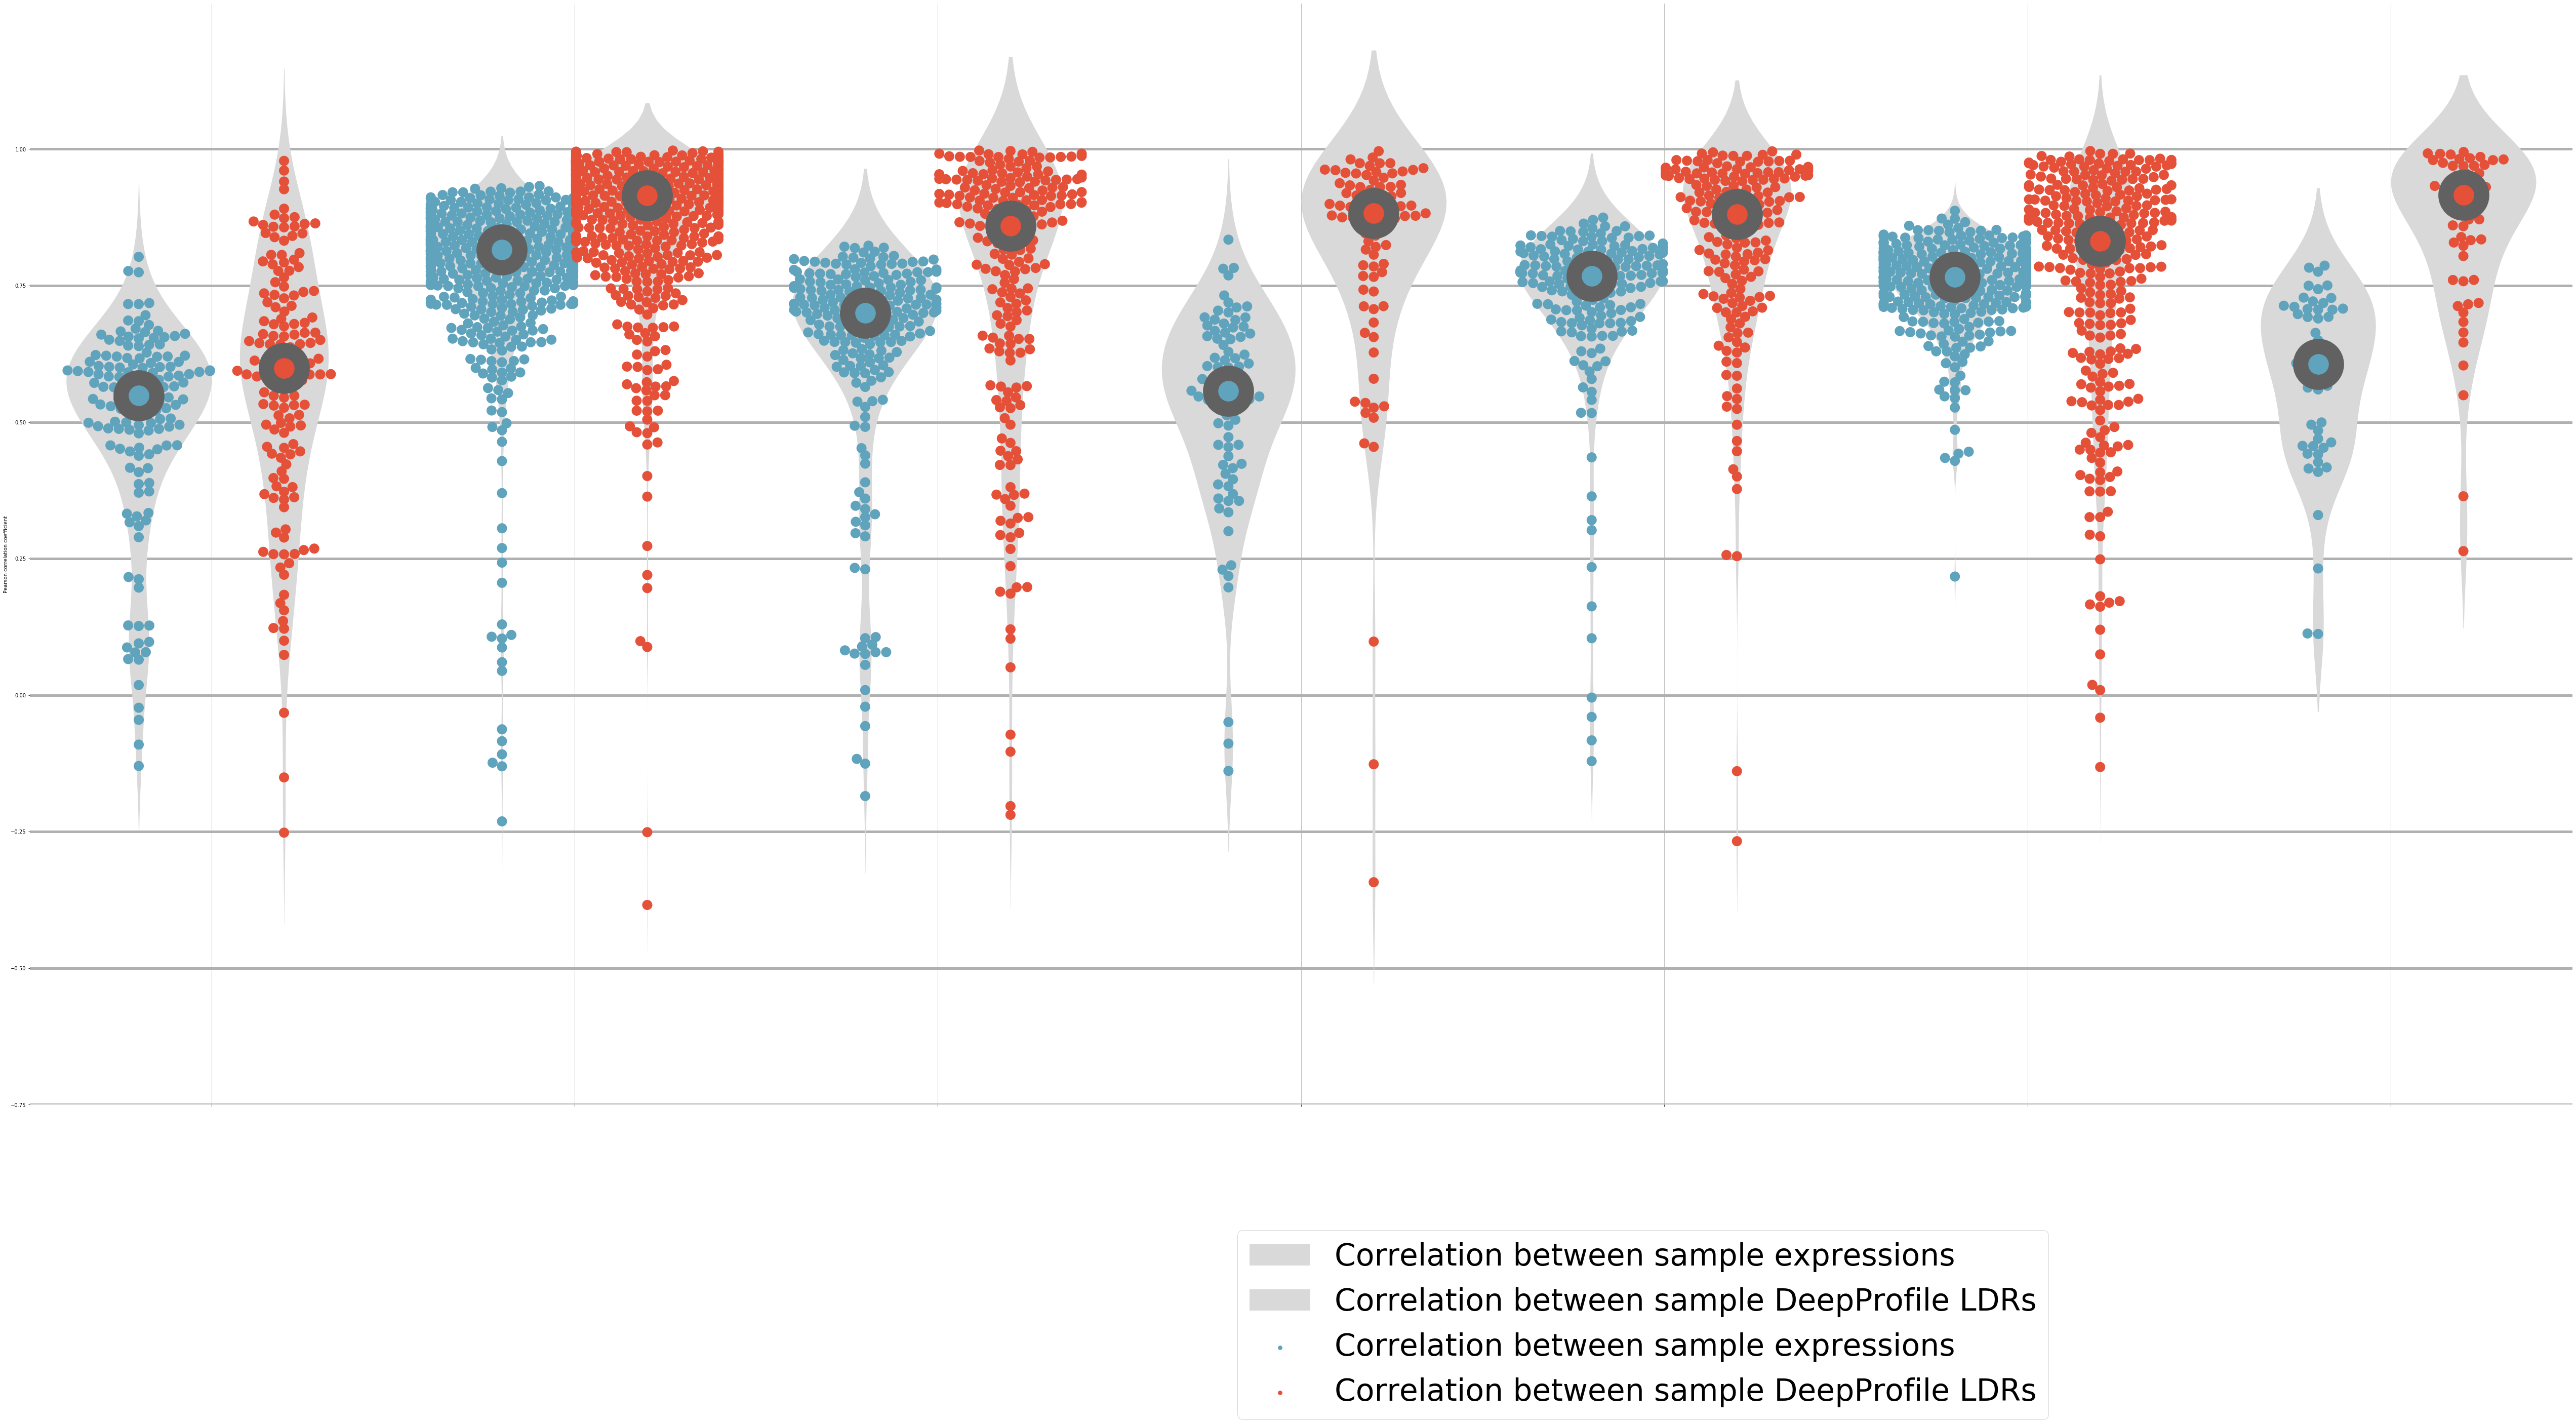

In [4]:
#Combine all datasets and create correlation plots
joined_df = pd.concat(all_dfs)

#Plot settings
fig, ax = plt.subplots()
fig.set_size_inches(90, 40)

SMALL_SIZE = 60
MEDIUM_SIZE = 70
BIGGER_SIZE = 80

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

cm = {"Correlation between sample expressions": "#60a3bc", 
      "Correlation between sample DeepProfile LDRs":"#e55039"}
ax1 = sns.swarmplot(data = joined_df, y = 'values', 
              hue="type", x = 'cancer', palette = cm, 
              dodge=True, size= 20, alpha = 1.0,
              order = ['BRAIN', 'BRCA', 'COLON', 'KIDNEY', 'LUNG', 'OV', 'UTERINE'])

cm = {"Correlation between sample expressions": "#d9d9d9", 
      "Correlation between sample DeepProfile LDRs":"#d9d9d9"}
ax2 = sns.violinplot(data = joined_df, y = 'values', 
              hue="type", x = 'cancer', palette = cm, 
               inner = None, linewidth = 0, 
               order = ['BRAIN', 'BRCA', 'COLON', 'KIDNEY', 'LUNG', 'OV', 'UTERINE'])

#Add scatter plots for means
medians_df = joined_df.groupby(['type', 'cancer']).median()
for i in range(len(cancer_types)):
    plt.scatter(i - 0.2, medians_df.iloc[i + 7], color = '#60a3bc', 
                s = 5000, edgecolors = '#616161', linewidths = 30, zorder = 10)
    plt.scatter(i + 0.2, medians_df.iloc[i], color = '#e55039', 
                s = 5000, edgecolors = '#616161', linewidths = 30, zorder = 10) 

plt.setp(ax2.collections, alpha = 1.0)
plt.yticks(np.arange(-0.75, 1.1, step = 0.25))
plt.xticks(np.arange(7), [])
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('')
plt.grid(True)
plt.box(False)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(linewidth = 5)
plt.legend(bbox_to_anchor=(0.8, -0.1))
plt.show()


In [5]:
joined_df.groupby(['type', 'cancer'], sort = False).median()

,,values
type,cancer,
Correlation between sample expressions,BRCA,0.815517
Correlation between sample DeepProfile LDRs,BRCA,0.915372
Correlation between sample expressions,COLON,0.699995
Correlation between sample DeepProfile LDRs,COLON,0.859153
Correlation between sample expressions,LUNG,0.767819
Correlation between sample DeepProfile LDRs,LUNG,0.880603
Correlation between sample expressions,BRAIN,0.549201
Correlation between sample DeepProfile LDRs,BRAIN,0.599015
Correlation between sample expressions,OV,0.765810


values    0.815517
Name: (Correlation between sample expressions, BRCA), dtype: float64
values    0.915372
Name: (Correlation between sample DeepProfile LDRs, BRCA), dtype: float64
values    0.699995
Name: (Correlation between sample expressions, COLON), dtype: float64
values    0.859153
Name: (Correlation between sample DeepProfile LDRs, COLON), dtype: float64
values    0.767819
Name: (Correlation between sample expressions, LUNG), dtype: float64
values    0.880603
Name: (Correlation between sample DeepProfile LDRs, LUNG), dtype: float64
values    0.549201
Name: (Correlation between sample expressions, BRAIN), dtype: float64
values    0.599015
Name: (Correlation between sample DeepProfile LDRs, BRAIN), dtype: float64
values    0.76581
Name: (Correlation between sample expressions, OV), dtype: float64
values    0.831822
Name: (Correlation between sample DeepProfile LDRs, OV), dtype: float64
values    0.557516
Name: (Correlation between sample expressions, KIDNEY), dtype: float64
values

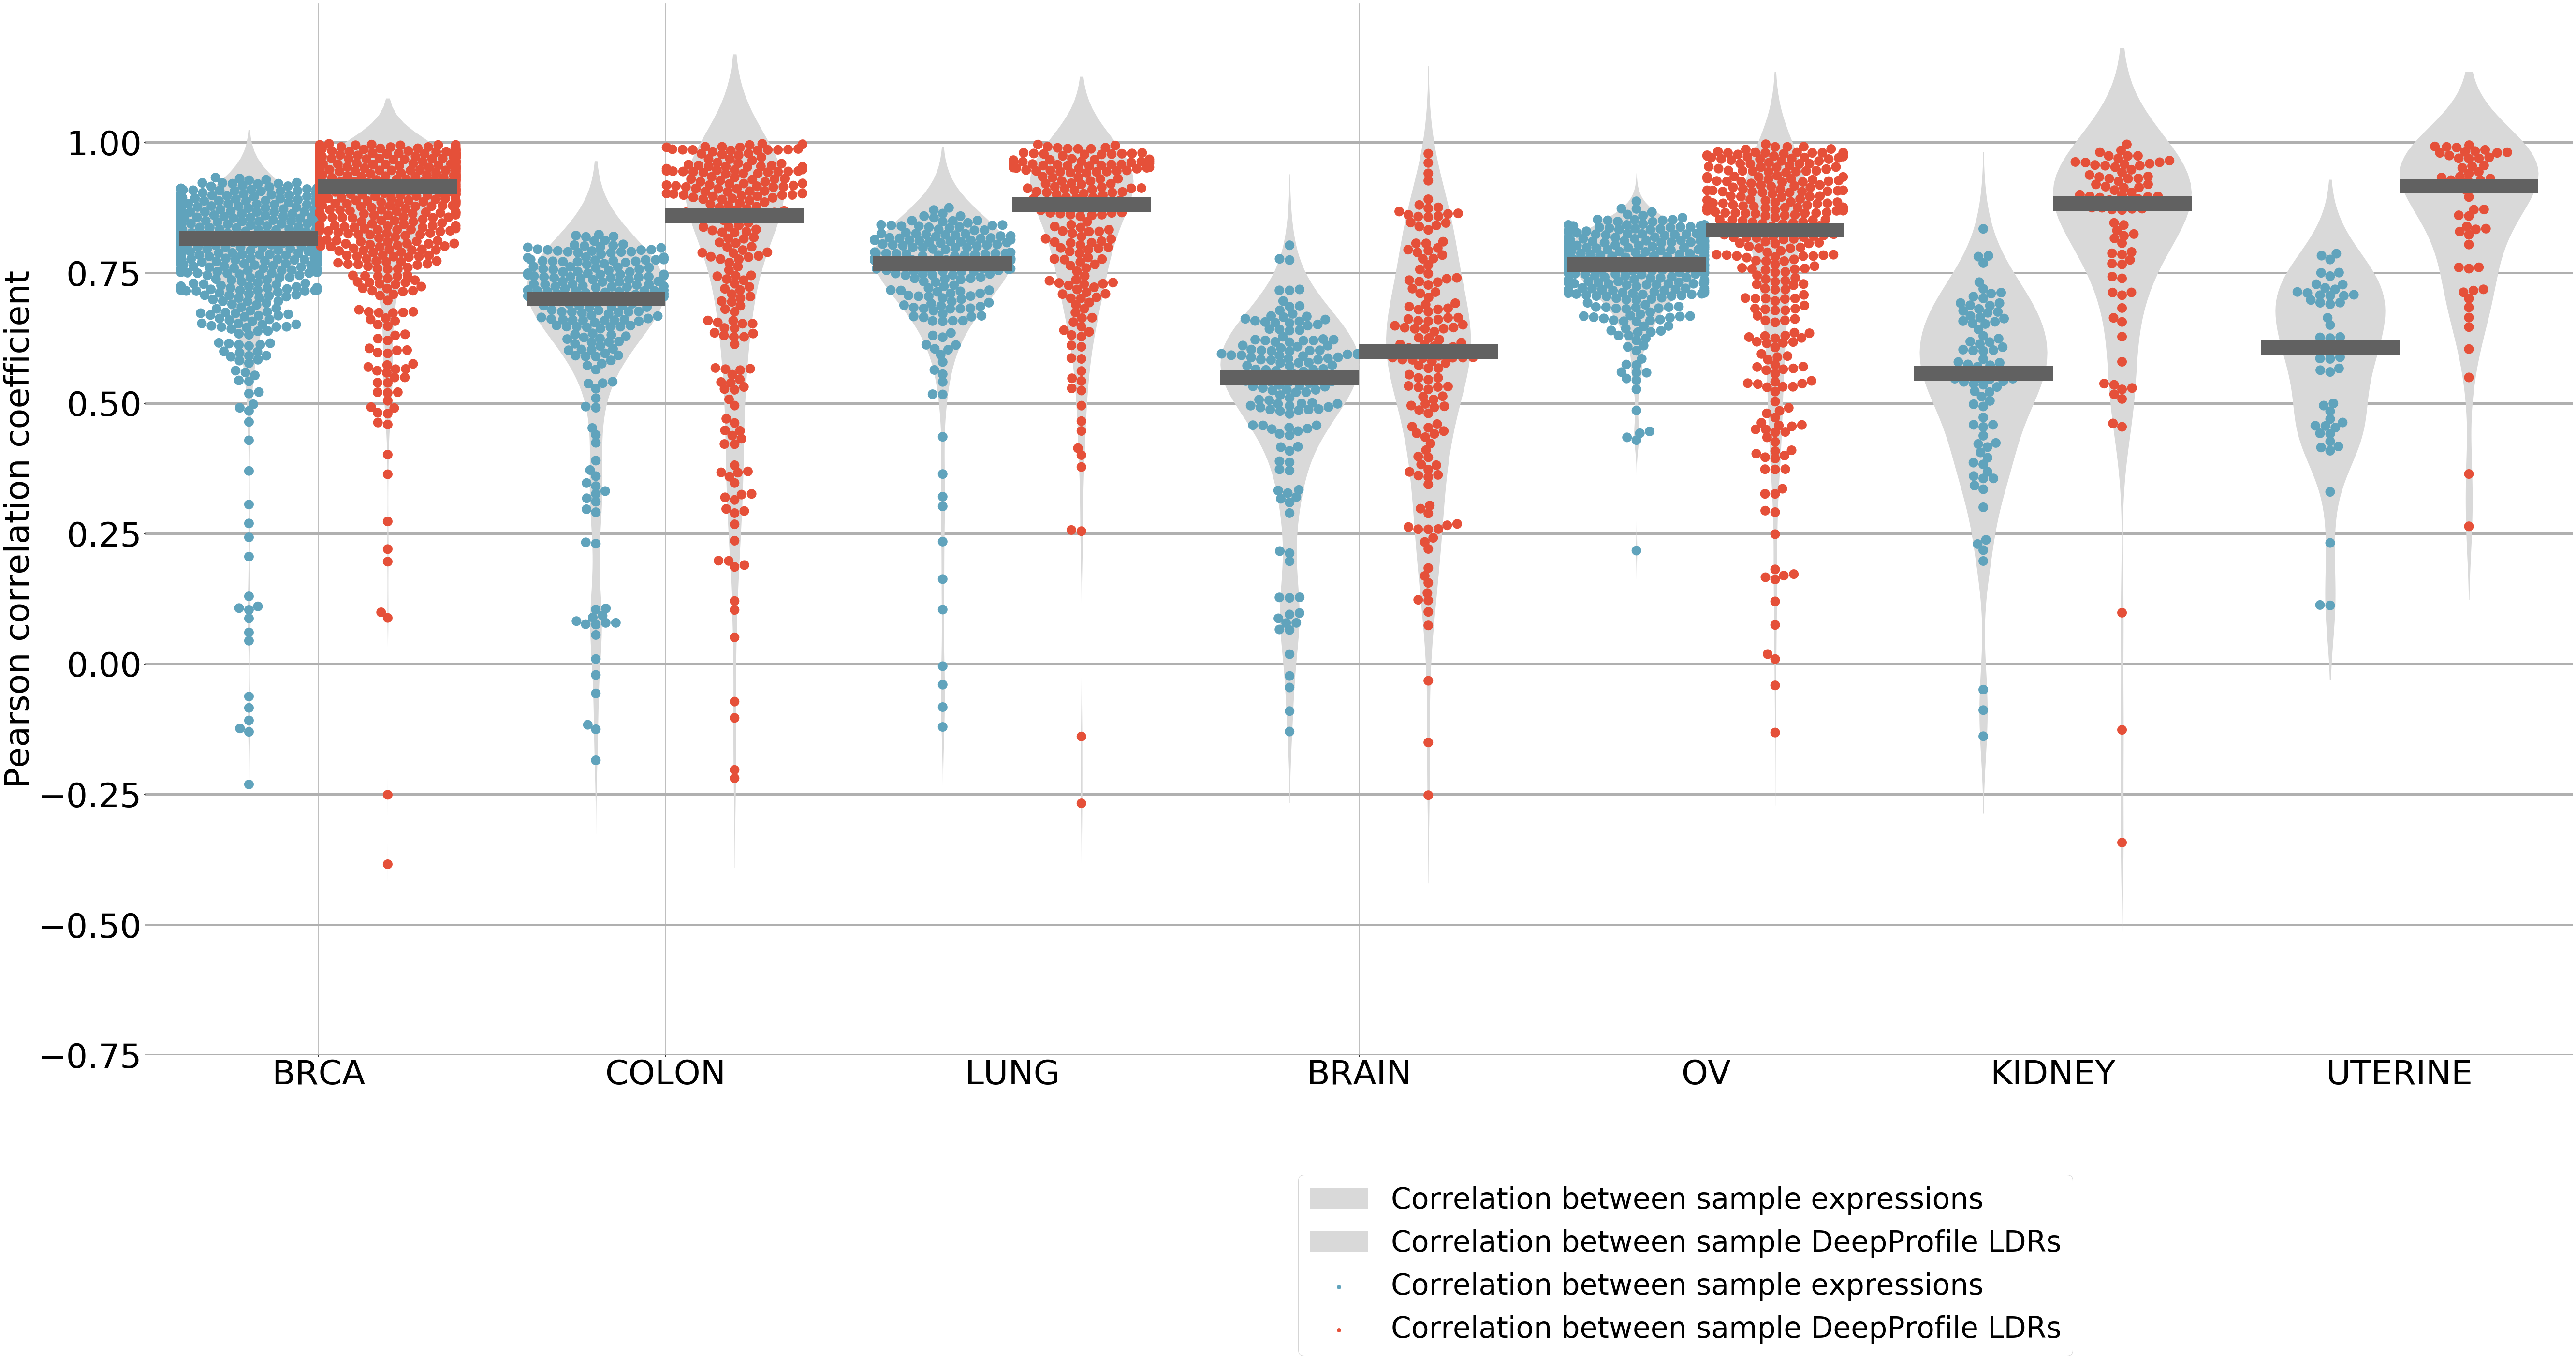

In [21]:
#Combine all datasets and create correlation plots
joined_df = pd.concat(all_dfs)

#Plot settings
fig, ax = plt.subplots()
fig.set_size_inches(90, 40)

SMALL_SIZE = 60
MEDIUM_SIZE = 70
BIGGER_SIZE = 80

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

cm = {"Correlation between sample expressions": "#60a3bc", 
      "Correlation between sample DeepProfile LDRs":"#e55039"}
ax1 = sns.swarmplot(data = joined_df, y = 'values', 
              hue="type", x = 'cancer', palette = cm, 
              dodge=True, size= 20, alpha = 1.0,
              order = ['BRCA', 'COLON', 'LUNG', 'BRAIN',  'OV', 'KIDNEY', 'UTERINE'])

cm = {"Correlation between sample expressions": "#d9d9d9", 
      "Correlation between sample DeepProfile LDRs":"#d9d9d9"}
ax2 = sns.violinplot(data = joined_df, y = 'values', 
              hue="type", x = 'cancer', palette = cm, 
               inner = None, linewidth = 0,
              order = ['BRCA', 'COLON', 'LUNG', 'BRAIN',  'OV', 'KIDNEY', 'UTERINE'])

#Add lines for means
medians_df = joined_df.groupby(['type', 'cancer'], sort = False).median(
    print(medians_df.iloc[(2 * i)])
    print(medians_df.iloc[(2 * i) + 1])
    plt.hlines(medians_df.iloc[(2 * i)], xmin = i - 0.4, xmax = i, 
               color = '#616161', linewidths = 30, zorder = 10)
    plt.hlines(medians_df.iloc[(2 * i) + 1], xmin = i, xmax = i + 0.4, 
               color = '#616161', linewidths = 30, zorder = 10)
    
plt.setp(ax2.collections, alpha = 1.0)
plt.yticks(np.arange(-0.75, 1.1, step = 0.25))
# plt.xticks(np.arange(7), [])
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('')
plt.grid(True)
plt.box(False)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(linewidth = 5)
plt.legend(bbox_to_anchor=(0.8, -0.1))
plt.show()


In [19]:
joined_df.groupby(['type', 'cancer'], sort = False).median()

,,values
type,cancer,
Correlation between sample expressions,BRCA,0.815517
Correlation between sample DeepProfile LDRs,BRCA,0.915372
Correlation between sample expressions,COLON,0.699995
Correlation between sample DeepProfile LDRs,COLON,0.859153
Correlation between sample expressions,LUNG,0.767819
Correlation between sample DeepProfile LDRs,LUNG,0.880603
Correlation between sample expressions,BRAIN,0.549201
Correlation between sample DeepProfile LDRs,BRAIN,0.599015
Correlation between sample expressions,OV,0.765810


In [40]:
from scipy import stats

for i in range(len(cancer_types)):
    cancer_type = cancer_types[i]
    print("------")
    print(cancer_type)
    sub_df = joined_df[joined_df['type'] == 'Correlation between sample expressions']
    sub_df = sub_df[sub_df['cancer'] == cancer_type]
    expression_vals = sub_df['values'].values
    print(np.mean(expression_vals))
    
    sub_df = joined_df[joined_df['type'] == 'Correlation between sample DeepProfile LDRs']
    sub_df = sub_df[sub_df['cancer'] == cancer_type]
    LDR_vals = sub_df['values'].values
    print(np.mean(LDR_vals))
    
    scores = stats.wilcoxon(LDR_vals, expression_vals,
               zero_method = 'zsplit').pvalue
    print("Final p-value: ", scores)
            

------
BRCA
0.7756649367685087
0.8675764279535451
Final p-value:  3.887295571159902e-64
------
COLON
0.6286505834783849
0.7526773407181723
Final p-value:  1.3437353917396928e-22
------
LUNG
0.719293171527477
0.8192471565707438
Final p-value:  3.432022264949312e-19
------
BRAIN
0.4972201045511893
0.5680159538532972
Final p-value:  6.853567118592442e-07
------
OV
0.7499174122839666
0.7569671715788793
Final p-value:  0.004115603478839866
------
KIDNEY
0.5289633094599421
0.8035783025501096
Final p-value:  1.3411867664402279e-15
------
UTERINE
0.5793470320628559
0.8518220135476724
Final p-value:  1.6256984569330967e-10
